<h1 align="center"><b>Stock Market Technical Analysis</b></h1>
<h2 align="center"><b>Algorithmic Approach</b></h2>
<h2 align="center"><b>for</b></h2>
<h2 align="center"><b>Investing in the Stock Market</b></h2>
<h2 align="center"><b>using Python</b></h2>
<br>
<h1 align="center"><b>Miguel Secillano</b></h1>
<h3 align="center"><b>(2021/2022 Science Fair Project)</b></h3>

<hr>
<br>
<h1 align="center"><b>Notebook 1</b></h1>
<h2 align="center"><b>Single Stock</b></h2>
<h3 align="center"><b>(Initial Experimentation)</b></h3>
<br>
<hr>
<br>

In [2]:
# #%%
# %load_ext autoreload
# %autoreload 2

# Load necessary library modules
import pandas as pd # Data Analysis
import yfinance as yf # Yahoo Finance, where the data comes from
import matplotlib.pyplot as plt # Data Visualization
import matplotlib.ticker as mtick # Data Visualization Formatter

plt.style.use("seaborn")

In [3]:
def list_dictionary_pairs(dict):
    print_stock_symbol_name(dict)
    for key, value in dict.items():
        print(key, ":", value)


def print_stock_symbol_name(dict):
    print(dict["symbol"] + ":", dict["shortName"])
    print("=" * 40)


def get_historial_data(ticker):
    return ticker.history(period="max")

def plot_historical_data(df_history, stock_name):
    # makes plot for data
    plt.figure(figsize=(16,9))
    plt.plot(df_history["Close"], label=f"{stock_name} Close")
    plt.title(f"{stock_name} History", fontsize=25, fontweight="bold")
    plt.xlabel("Time (-current)", fontsize=20)
    plt.ylabel("Closing Price (in U.S. dollars)", fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    plt.show()

def calculate_monthly_returns(df_history):
    for i in range(1, len(df_history) - 1):
        month = str(df_history.index[i]).split("-")[1]
        drr = df_history["Daily Return"][i]
        daily_return_rate.append((month, drr))
        monthly_return_rate[month] += drr

def plot_monthly_returns(monthly_return_rate, stock_name):
    # makes monthly bar chart for data
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(1, 1, 1)
    plt.bar(monthly_return_rate.keys(), height=monthly_return_rate.values())
    plt.title(f"{stock_name} Monthly Historical Returns", fontsize=25, fontweight="bold")
    plt.xlabel("Months", fontsize=20)
    plt.ylabel("Monthly Return Rate", fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()

In [4]:
# def calculate_monthly_returns_per_year(df_history):
#     years = {}
    
#     for i in range(1, len(df_history) - 1):
#         year = str(df_history.index[i]).split("-")[0]
#         years[year]
#         month = str(df_history.index[i]).split("-")[1]
#         drr = df_history["Daily Return"][i]
#         daily_return_rate.append((month, drr))
#         monthly_return_rate[month] += drr

def calculate_monthly_returns_per_year(df_history):
    years = {}
    current_year = 0
    monthly_return_rate = {"01": 0, "02": 0, "03": 0, "04": 0, "05": 0, "06": 0,
                       "07": 0, "08": 0, "09": 0, "10": 0, "11": 0, "12": 0}
    for i in range(1, len(df_history) - 1):
        year = str(df_history.index[i]).split("-")[0]
        month = str(df_history.index[i]).split("-")[1]

        if current_year != year:
            years[year] = monthly_return_rate
            current_year = year
            monthly_return_rate = {"01": 0, "02": 0, "03": 0, "04": 0, "05": 0, "06": 0,
                       "07": 0, "08": 0, "09": 0, "10": 0, "11": 0, "12": 0}
        
        if i == len(df_history) - 1:
            years[year] = monthly_return_rate
        
        drr = df_history["Daily Return"][i]
        daily_return_rate.append((month, drr))
        monthly_return_rate[month] += drr
    return years

In [5]:
stock = "^GSPC" # stock symbol ^GSPC
stock_ticker = yf.Ticker(stock)

In [6]:
stock_info = stock_ticker.info

In [7]:
df_history = get_historial_data(stock_ticker) # gets historical data

In [8]:
print(df_history)

                   Open         High          Low        Close      Volume  \
Date                                                                         
1927-12-30    17.660000    17.660000    17.660000    17.660000           0   
1928-01-03    17.760000    17.760000    17.760000    17.760000           0   
1928-01-04    17.719999    17.719999    17.719999    17.719999           0   
1928-01-05    17.549999    17.549999    17.549999    17.549999           0   
1928-01-06    17.660000    17.660000    17.660000    17.660000           0   
...                 ...          ...          ...          ...         ...   
2021-10-19  4497.339844  4520.399902  4496.410156  4519.629883  2531210000   
2021-10-20  4524.419922  4540.870117  4524.399902  4536.189941  2671560000   
2021-10-21  4532.240234  4551.439941  4526.890137  4549.779785  3016950000   
2021-10-22  4546.120117  4559.669922  4524.000000  4544.899902  3062810000   
2021-10-25  4553.689941  4572.620117  4537.359863  4566.479980  

In [9]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23567 entries, 1927-12-30 to 2021-10-25
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          23567 non-null  float64
 1   High          23567 non-null  float64
 2   Low           23567 non-null  float64
 3   Close         23567 non-null  float64
 4   Volume        23567 non-null  int64  
 5   Dividends     23567 non-null  int64  
 6   Stock Splits  23567 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.4 MB


In [10]:
df_history.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [11]:
# deletes the Dividends and Stock Splits columns from data; we don't need them
df_history.drop("Dividends", axis=1, inplace=True)
df_history.drop("Stock Splits", axis=1, inplace=True)
df_history.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [12]:
daily_return = df_history["Close"].pct_change(1)

In [13]:
daily_return[1:]

Date
1928-01-03    0.005663
1928-01-04   -0.002252
1928-01-05   -0.009594
1928-01-06    0.006268
1928-01-09   -0.009060
                ...   
2021-10-19    0.007393
2021-10-20    0.003664
2021-10-21    0.002996
2021-10-22   -0.001073
2021-10-25    0.004748
Name: Close, Length: 23566, dtype: float64

In [14]:
df_history["Daily Return"] = daily_return

In [15]:
df_history.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Return'], dtype='object')

In [16]:
df_history

,Open,High,Low,Close,Volume,Daily Return
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,NaN
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,0.005663
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,-0.002252
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,-0.009594
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,0.006268
...,...,...,...,...,...,...
2021-10-19,4497.339844,4520.399902,4496.410156,4519.629883,2531210000,0.007393
2021-10-20,4524.419922,4540.870117,4524.399902,4536.189941,2671560000,0.003664
2021-10-21,4532.240234,4551.439941,4526.890137,4549.779785,3016950000,0.002996


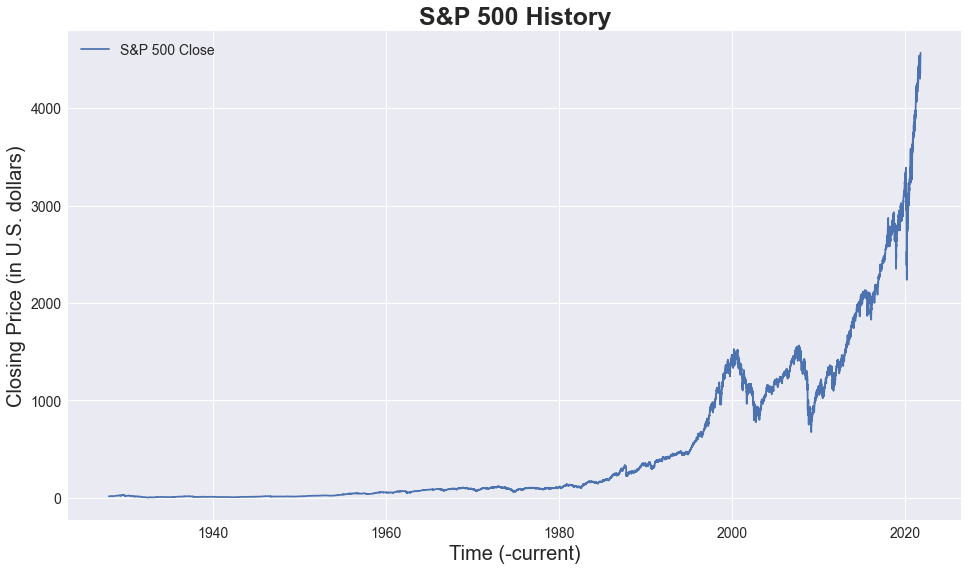

In [17]:
plot_historical_data(df_history, "S&P 500")

In [18]:
daily_return_rate = []
monthly_return_rate = {"01": 0, "02": 0, "03": 0, "04": 0, "05": 0, "06": 0,
                       "07": 0, "08": 0, "09": 0, "10": 0, "11": 0, "12": 0}
calculate_monthly_returns_per_year(df_history)

{'1928': {'01': 0,
  '02': 0,
  '03': 0,
  '04': 0,
  '05': 0,
  '06': 0,
  '07': 0,
  '08': 0,
  '09': 0,
  '10': 0,
  '11': 0,
  '12': 0},
 '1929': {'01': -0.004523030217222002,
  '02': -0.017404777241079916,
  '03': 0.11148133386713155,
  '04': 0.025025916794988556,
  '05': 0.013694099824307582,
  '06': -0.04186210093910203,
  '07': 0.015908714809901747,
  '08': 0.07222713024590821,
  '09': 0.013165732221620208,
  '10': 0.0257574080428018,
  '11': 0.1140626826248069,
  '12': 0.004838858226523524},
 '1930': {'01': 0.056637275908697715,
  '02': -0.004514956391416303,
  '03': 1.4638498864960603e-05,
  '04': 0.01708447547751435,
  '05': -0.040807302656423516,
  '06': 0.09966815921900651,
  '07': 0.05301746507778393,
  '08': 0.09545151039249444,
  '09': -0.0483405172675877,
  '10': -0.19141119422356423,
  '11': -0.12392909012538111,
  '12': 0.029783598174296988},
 '1931': {'01': 0.061360430849681125,
  '02': 0.02203730738840992,
  '03': 0.0376311802691196,
  '04': 0.03270141138481564,
  

In [19]:
yearly_return_rate = 0
for value in monthly_return_rate.values():
    yearly_return_rate += value
yearly_return_rate

0

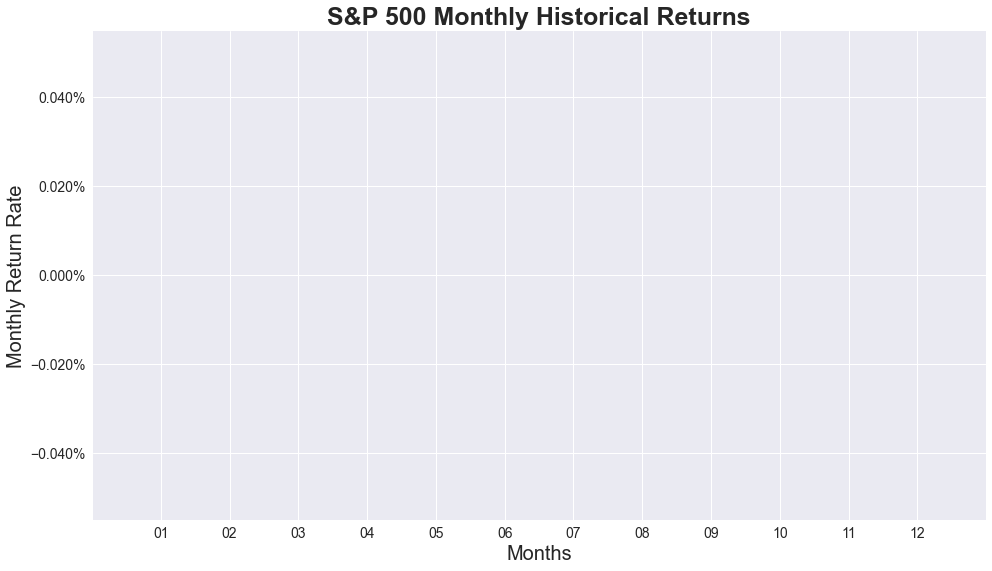

In [20]:
plot_monthly_returns(monthly_return_rate, "S&P 500")

In [21]:
from math import pi
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [22]:
stock_symbol = "^GSPC"
stock_ticker = yf.Ticker(stock_symbol)
stock_short_name = stock_ticker.info["shortName"]
# data = yf.download(stock_symbol)
data = yf.download(stock_symbol, start="2020-01-01", end="2021-10-02")

[*********************100%***********************]  1 of 1 completed


In [23]:
data.reset_index(inplace=True)
print(data.columns)
print()
print(data)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

          Date         Open         High          Low        Close  \
0   2020-01-02  3244.669922  3258.139893  3235.530029  3257.850098   
1   2020-01-03  3226.360107  3246.149902  3222.340088  3234.850098   
2   2020-01-06  3217.550049  3246.840088  3214.639893  3246.280029   
3   2020-01-07  3241.860107  3244.909912  3232.429932  3237.179932   
4   2020-01-08  3238.590088  3267.070068  3236.669922  3253.050049   
..         ...          ...          ...          ...          ...   
437 2021-09-27  4442.120117  4457.299805  4436.189941  4443.109863   
438 2021-09-28  4419.540039  4419.540039  4346.330078  4352.629883   
439 2021-09-29  4362.410156  4385.569824  4355.080078  4359.459961   
440 2021-09-30  4370.669922  4382.549805  4306.240234  4307.540039   
441 2021-10-01  4317.160156  4375.189941  4288.520020  4357.040039   

       Adj Close      Volume  
0    3257.850098  3458250000  
1    3234

In [24]:
inc = data["Close"] > data["Open"]
dec = data["Open"] > data["Close"]
w = 12 * 60 * 60 * 1000
TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

In [25]:
p = figure(
    x_axis_type = "datetime",
    plot_width = 1000,
    tools = TOOLS,
    title = stock_short_name + " - Candlestick Chart 2020-present"
)

In [26]:
p.segment(data["Date"], data["High"], data["Date"], data["Low"], color="black")

GlyphRenderer(id='1038', ...)

In [27]:
p.vbar(
    data["Date"][inc],
    w,
    data["Open"][inc],
    data["Close"][inc],
    fill_color="green",
    line_color="green"
)
p.vbar(
    data["Date"][dec],
    w,
    data["Open"][dec],
    data["Close"][dec],
    fill_color="red",
    line_color="red"
)

GlyphRenderer(id='1052', ...)

In [28]:
show(p)

In [30]:
# import mplfinance as mpf
# mpf.plot(df_history[-60:])
# plt.show()